<a href="https://colab.research.google.com/github/Moxammed/Data-Science-and-ML/blob/main/7_Digits_Recognition_using_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

#Learn the Shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#See the values inside
print(X_train[0])
print(y_train[0])

#Make the inside values smaller for better performance and training. nn works with small numbers better
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape)
print(X_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [27]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9073 - loss: 0.3036 - val_accuracy: 0.9801 - val_loss: 0.0614
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9853 - loss: 0.0486 - val_accuracy: 0.9899 - val_loss: 0.0292
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9877 - val_loss: 0.0342
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9919 - val_loss: 0.0270
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9973 - loss: 0.0077 - val_accuracy: 0.9922 - val_loss: 0.0272
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9979 - loss: 0

In [28]:
# Get total accuracy of the evaluation (untrained data)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9866 - loss: 0.0484
Test accuracy: 99.04%


In [29]:
predictions = model.predict(X_test)

# Single Sample to check
predicted_digit = np.argmax(predictions[0])
true_digit = y_test[0]

print("Predicted:", predicted_digit)
print("True:", true_digit)

# 10 Samples to check
for i in range(10):
    predicted_digit = np.argmax(predictions[i])
    true_digit = y_test[i]
    print(f"Sample {i + 1}: Predicted: {predicted_digit}, True: {true_digit}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted: 7
True: 7
Sample 1: Predicted: 7, True: 7
Sample 2: Predicted: 2, True: 2
Sample 3: Predicted: 1, True: 1
Sample 4: Predicted: 0, True: 0
Sample 5: Predicted: 4, True: 4
Sample 6: Predicted: 1, True: 1
Sample 7: Predicted: 4, True: 4
Sample 8: Predicted: 9, True: 9
Sample 9: Predicted: 5, True: 5
Sample 10: Predicted: 9, True: 9


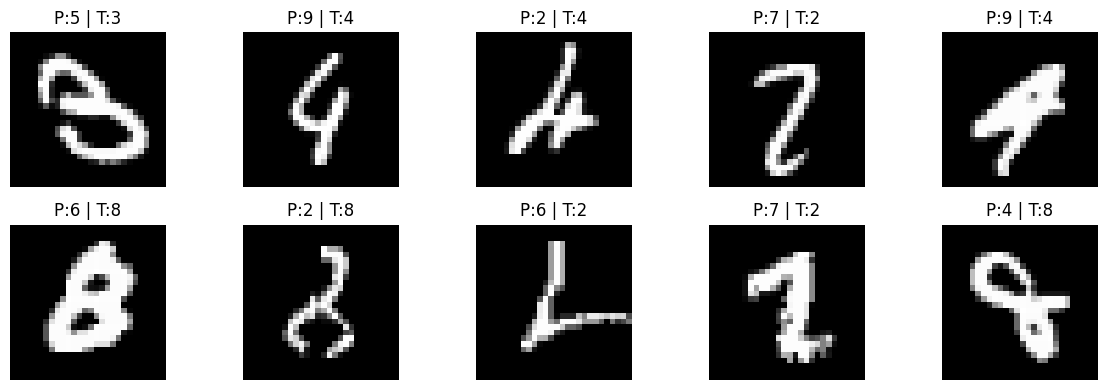

In [30]:

# Find misclassified indices
predicted_labels = np.argmax(predictions, axis=1)
wrong_indices = np.where(predicted_labels != y_test)[0]

plt.figure(figsize=(12, 4))
for i, idx in enumerate(wrong_indices[:10]):
    plt.subplot(2, 5, i + 1)

    # Reshape flattened image back to 28x28
    img = X_test[idx].reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.title(f"P:{predicted_labels[idx]} | T:{y_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
import numpy as np

mistake_counts = {}

for digit in range(10):
    idx = np.where(y_test == digit)[0]
    mistakes = np.sum(predicted_labels[idx] != digit)
    mistake_counts[digit] = mistakes

sorted_mistakes = sorted(mistake_counts.items(), key=lambda x: x[1], reverse=True)

print("Digits with most mistakes (descending):")
for digit, count in sorted_mistakes:
    print(f"Digit {digit}: {count} mistakes")

Digits with most mistakes (descending):
Digit 8: 19 mistakes
Digit 9: 19 mistakes
Digit 2: 14 mistakes
Digit 4: 11 mistakes
Digit 5: 10 mistakes
Digit 3: 7 mistakes
Digit 6: 6 mistakes
Digit 0: 5 mistakes
Digit 7: 4 mistakes
Digit 1: 1 mistakes


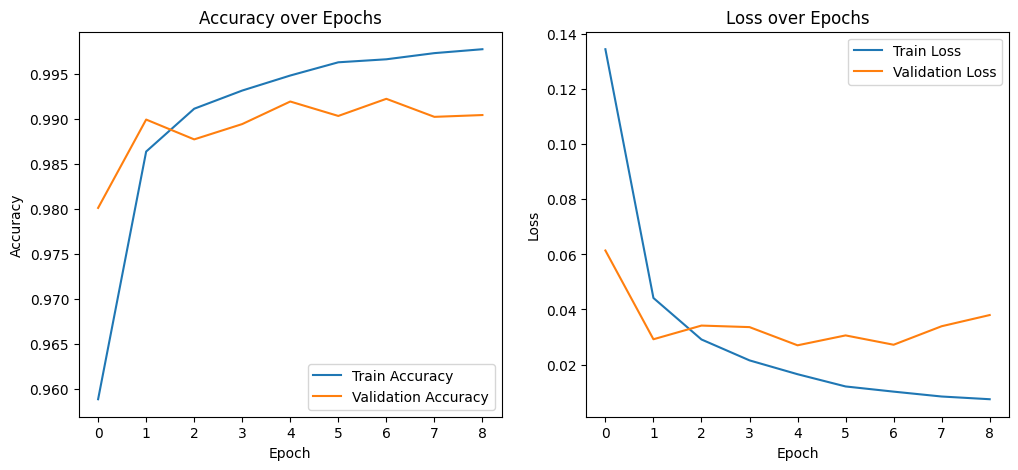

In [32]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
